In [1]:
import pandas as pd
import datetime 
import numpy as np
import matplotlib.pyplot as plt
import re
import seaborn as sns

%matplotlib inline

In [2]:
ship = pd.read_csv('../data/fuel_consumption_by_ship_size_prepped.csv')
#source: The Geography of Transport Systems- https://transportgeography.org/contents/chapter4/transportation-and-energy/fuel-consumption-containerships/
#converted to data with:  http://getdata-graph-digitizer.com/

truck = pd.read_csv('../data/mpg_trucks_prepped.csv')
#source: US Energey Information Administration - https://www.eia.gov/totalenergy/data/browser/?tbl=T01.08



In [3]:
#setting the size of my visuals:
sns.set(rc={"figure.figsize":(13, 8)},font_scale=1.5, style='darkgrid')

In [4]:
#cleaning and calculations work for df done in excel

ship.head()

,Ship Size (TEU),TEU avg,TEU to weight lbs,TEU to weight - tons,Speed- Knots,Fuel Consumption - Tons per Day,Speed-MPH,Ton miles per hour,Fuel Consumption - Gallons per day,Fuel Consumption- Gallons/hour,MPG,Gallons per mile,Ton MPG,Ton MPG cleaner
0,"10,000+",10000.0,529100000.0,264550.0,17.48,103.56,20.102576,13160.00495,77468.63057,3227.859607,0.006228,160.569452,1647.573749,1647.57
1,"10,000+",10000.0,529100000.0,264550.0,17.55,105.62,20.185889,13105.68954,79011.10832,3292.129514,0.006132,163.090634,1622.104198,1622.10
2,"10,000+",10000.0,529100000.0,264550.0,17.66,108.71,20.304878,13028.88871,81322.85500,3388.452292,0.005992,166.878729,1585.282806,1585.28
3,"10,000+",10000.0,529100000.0,264550.0,17.74,109.77,20.400366,12967.90446,82111.82351,3421.325979,0.005963,167.709047,1577.434401,1577.43
4,"10,000+",10000.0,529100000.0,264550.0,17.79,110.81,20.459967,12930.12860,82888.97226,3453.707177,0.005924,168.803168,1567.209808,1567.21


In [5]:
ship.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 429 entries, 0 to 428
Data columns (total 14 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   Ship Size (TEU)                     429 non-null    object 
 1   TEU avg                             429 non-null    float64
 2   TEU to weight lbs                   429 non-null    float64
 3   TEU to weight - tons                429 non-null    float64
 4   Speed- Knots                        429 non-null    float64
 5   Fuel Consumption - Tons per Day     429 non-null    float64
 6   Speed-MPH                           429 non-null    float64
 7   Ton miles per hour                  429 non-null    float64
 8   Fuel Consumption - Gallons per day  429 non-null    float64
 9   Fuel Consumption- Gallons/hour      429 non-null    float64
 10  MPG                                 429 non-null    float64
 11  Gallons per mile                    429 non-n

In [6]:
#Simplifying my df for easier visualization

ship_graph = ship[['Ship Size (TEU)', 'Speed-MPH', 'Ton MPG cleaner']]

Text(0.5, 1.0, 'Ton-MPG by Ship Size and Speed')

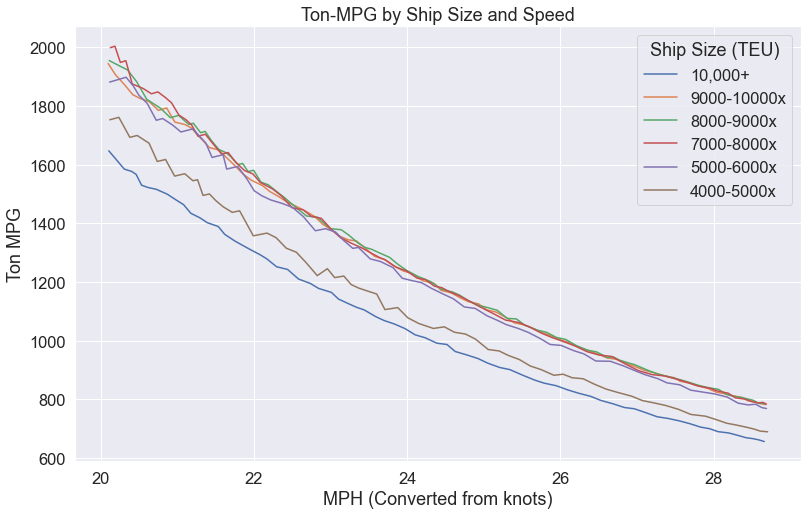

In [7]:
a = sns.lineplot(data = ship_graph, x = 'Speed-MPH', y = 'Ton MPG cleaner', hue = 'Ship Size (TEU)')
a.set(xlabel = 'MPH (Converted from knots)', ylabel = 'Ton MPG')
a.set_title('Ton-MPG by Ship Size and Speed')

NOTE:  the research i found supports this trend of mpg going down signifcantly in relation to ship speed.
however, the numbers i see in most reports are significantly lower than the numbers i gained from the data i found

my data is from a good source, and i don't know where the articles get their data from
but i had to (reasonably!) guess at the amount of weight carried by ship and then average it, vs getting accurate cargo weight readings

Data with live tracking of ships, speeds, and cargo types and weights appeared to be available - but behind a paywall
Or free but on a ship-by-ship basis, which exceeds my current abilities and the scope of this project to tabulate: 
https://www.marinetraffic.com/en/ais/home/centerx:-14.4/centery:27.2/zoom:6 

In [8]:
truck.head()

,MSN,YYYYMM,Value,Column_Order,Description,Unit,Avg weight hauled - lbs,Source/Notes:,Avg weight/tons
0,TRFRRUS,194913,9,9,Heavy-Duty Trucks Fuel Economy,Miles per Gallon,44000,https://www.freightwaves.com/news/how-much-wei...,22
1,TRFRRUS,195013,8.4,9,Heavy-Duty Trucks Fuel Economy,Miles per Gallon,44000,NaN,22
2,TRFRRUS,195113,8.5,9,Heavy-Duty Trucks Fuel Economy,Miles per Gallon,44000,NaN,22
3,TRFRRUS,195213,8.4,9,Heavy-Duty Trucks Fuel Economy,Miles per Gallon,44000,NaN,22
4,TRFRRUS,195313,8.5,9,Heavy-Duty Trucks Fuel Economy,Miles per Gallon,44000,NaN,22


In [9]:
#simplifying df for visualization.  All i want here is the avg MPG for transit trucks

truck_visual = truck[['Description','Avg weight/tons','Value']]

In [10]:
truck_visual.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 213 entries, 0 to 212
Data columns (total 3 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Description      213 non-null    object
 1   Avg weight/tons  213 non-null    int64 
 2   Value            213 non-null    object
dtypes: int64(1), object(2)
memory usage: 5.1+ KB


In [11]:
truck_visual.iloc[71]

Description        Light-Duty Vehicles, Long Wheelbase Fuel Economy
Avg weight/tons                                                  10
Value                                                 Not Available
Name: 71, dtype: object

In [12]:
#got an error when trying to convert data to numeric form.  Found text.  
#deleting rows where data unavailable - not needed for my average-seeking calculation

truck_visual = truck_visual[truck_visual['Value'] != 'Not Available']

In [13]:
#converting to numbers so i can do math

truck_visual['Value'] = pd.to_numeric(truck_visual['Value'])

In [14]:
#finding the avg mpg for each truck by weightclass/avg tons hauled 

truck_visual.groupby('Avg weight/tons').mean()

,Value
Avg weight/tons,
5,18.152113
10,14.905556
22,6.491549


In [15]:
#converting my query to a new df

truck_visual2 = truck_visual.groupby('Avg weight/tons').mean()
truck_visual2.head()

,Value
Avg weight/tons,
5,18.152113
10,14.905556
22,6.491549


In [16]:
truck_visual2.reset_index(drop=False, inplace=True)

In [17]:
truck_visual2.head()

,Avg weight/tons,Value
0,5,18.152113
1,10,14.905556
2,22,6.491549


In [18]:
#calculating the ton-mpg per truck size

truck_visual2['Ton_MPG'] = truck_visual2['Value']*truck_visual2['Avg weight/tons']

In [19]:
truck_visual2.head()

,Avg weight/tons,Value,Ton_MPG
0,5,18.152113,90.760563
1,10,14.905556,149.055556
2,22,6.491549,142.814085


In [20]:
#renaming for visualization clarity

truck_types = ['Light Duty - Short Wheelbase', 'Light Duty - Long Wheelbase', 'Heavy Duty']
truck_visual2['truck_types'] = truck_types

In [21]:
truck_visual2.head()

,Avg weight/tons,Value,Ton_MPG,truck_types
0,5,18.152113,90.760563,Light Duty - Short Wheelbase
1,10,14.905556,149.055556,Light Duty - Long Wheelbase
2,22,6.491549,142.814085,Heavy Duty


In [22]:
#to show the values of the data on my graph:

def show_values(axs, orient="v", space=.01):
    def _single(ax):
        if orient == "v":
            for p in ax.patches:
                _x = p.get_x() + p.get_width() / 2
                _y = p.get_y() + p.get_height() + (p.get_height()*0.01)
                value = '{:.1f}'.format(p.get_height())
                ax.text(_x, _y, value, ha="center") 
        elif orient == "h":
            for p in ax.patches:
                _x = p.get_x() + p.get_width() + float(space)
                _y = p.get_y() + p.get_height() - (p.get_height()*0.5)
                value = '{:.1f}'.format(p.get_width())
                ax.text(_x, _y, value, ha="left")

    if isinstance(axs, np.ndarray):
        for idx, ax in np.ndenumerate(axs):
            _single(ax)
    else:
        _single(axs)

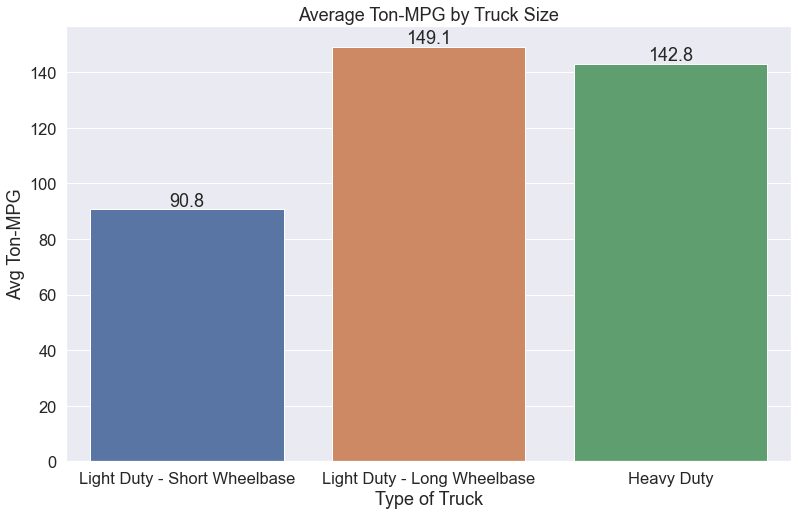

In [23]:
b = sns.barplot(data=truck_visual2, x='truck_types', y='Ton_MPG')
b.set(xlabel = 'Type of Truck', ylabel = 'Avg Ton-MPG')
b.set_title('Average Ton-MPG by Truck Size')

show_values(b)

In [24]:
#note - i did not find datasets for planes or trains, but i did find quotes of ton miles from reliable sources:
#Plane: https://www.conservationfund.org/images/programs/files/CSX_Final-Curriculum.pdf
#train: https://www.factcheck.org/2008/07/fuel-efficient-freight-trains/

Plane_Train_TonMPG_viz = pd.DataFrame({
    "Type":['Plane','Train'],
    "Avg. Ton MPG": [4.5, 436]
})

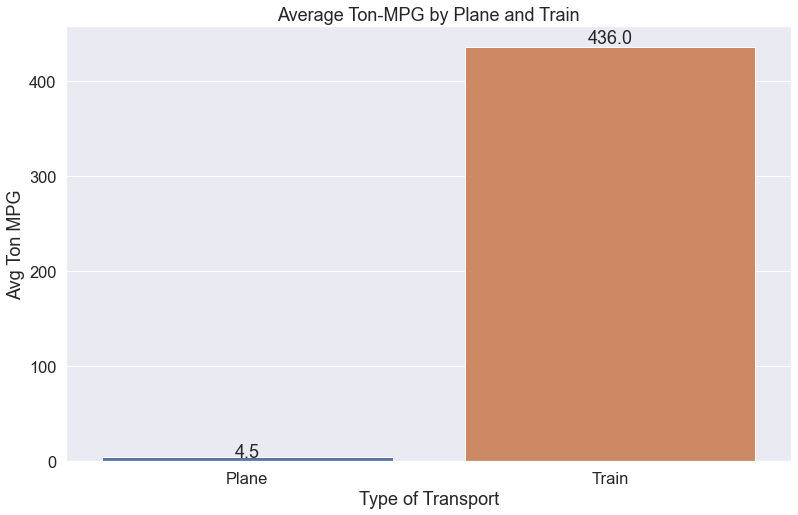

In [25]:
c = sns.barplot(data=Plane_Train_TonMPG_viz, x='Type', y='Avg. Ton MPG')
c.set(xlabel = 'Type of Transport', ylabel = 'Avg Ton MPG')
c.set_title('Average Ton-MPG by Plane and Train')

show_values(c)

Putting it together - 1000 miles

I want to know how many gallons of fuel are used to travel 1000 miles for slow ships (22mph) and standard ships (26mph)

In [26]:
ship

,Ship Size (TEU),TEU avg,TEU to weight lbs,TEU to weight - tons,Speed- Knots,Fuel Consumption - Tons per Day,Speed-MPH,Ton miles per hour,Fuel Consumption - Gallons per day,Fuel Consumption- Gallons/hour,MPG,Gallons per mile,Ton MPG,Ton MPG cleaner
0,"10,000+",10000.0,529100000.0,264550.0,17.48,103.56,20.102576,13160.004950,77468.63057,3227.859607,0.006228,160.569452,1647.573749,1647.57
1,"10,000+",10000.0,529100000.0,264550.0,17.55,105.62,20.185889,13105.689540,79011.10832,3292.129514,0.006132,163.090634,1622.104198,1622.10
2,"10,000+",10000.0,529100000.0,264550.0,17.66,108.71,20.304878,13028.888710,81322.85500,3388.452292,0.005992,166.878729,1585.282806,1585.28
3,"10,000+",10000.0,529100000.0,264550.0,17.74,109.77,20.400366,12967.904460,82111.82351,3421.325979,0.005963,167.709047,1577.434401,1577.43
4,"10,000+",10000.0,529100000.0,264550.0,17.79,110.81,20.459967,12930.128600,82888.97226,3453.707177,0.005924,168.803168,1567.209808,1567.21
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
424,4000-5000x,4500.0,238095000.0,119047.5,24.61,151.73,28.299514,4206.697690,113499.17740,4729.132391,0.005984,167.110022,712.390002,712.39
425,4000-5000x,4500.0,238095000.0,119047.5,24.71,153.80,28.418715,4189.052907,115053.47490,4793.894787,0.005928,168.687951,705.726199,705.73
426,4000-5000x,4500.0,238095000.0,119047.5,24.81,155.88,28.525953,4173.304886,116603.83250,4858.493020,0.005871,170.318341,698.970491,698.97
427,4000-5000x,4500.0,238095000.0,119047.5,24.88,157.94,28.609267,4161.151750,118146.31020,4922.762926,0.005812,172.068826,691.859784,691.86


In [27]:
ship['1000mi_time'] = 1000/ship['Speed-MPH']

In [28]:
ship['1000mi_fuel'] = ship['1000mi_time']*ship['Gallons per mile']

In [29]:
ship

,Ship Size (TEU),TEU avg,TEU to weight lbs,TEU to weight - tons,Speed- Knots,Fuel Consumption - Tons per Day,Speed-MPH,Ton miles per hour,Fuel Consumption - Gallons per day,Fuel Consumption- Gallons/hour,MPG,Gallons per mile,Ton MPG,Ton MPG cleaner,1000mi_time,1000mi_fuel
0,"10,000+",10000.0,529100000.0,264550.0,17.48,103.56,20.102576,13160.004950,77468.63057,3227.859607,0.006228,160.569452,1647.573749,1647.57,49.744868,7987.506250
1,"10,000+",10000.0,529100000.0,264550.0,17.55,105.62,20.185889,13105.689540,79011.10832,3292.129514,0.006132,163.090634,1622.104198,1622.10,49.539556,8079.437617
2,"10,000+",10000.0,529100000.0,264550.0,17.66,108.71,20.304878,13028.888710,81322.85500,3388.452292,0.005992,166.878729,1585.282806,1585.28,49.249249,8218.652024
3,"10,000+",10000.0,529100000.0,264550.0,17.74,109.77,20.400366,12967.904460,82111.82351,3421.325979,0.005963,167.709047,1577.434401,1577.43,49.018728,8220.884140
4,"10,000+",10000.0,529100000.0,264550.0,17.79,110.81,20.459967,12930.128600,82888.97226,3453.707177,0.005924,168.803168,1567.209808,1567.21,48.875935,8250.412642
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
424,4000-5000x,4500.0,238095000.0,119047.5,24.61,151.73,28.299514,4206.697690,113499.17740,4729.132391,0.005984,167.110022,712.390002,712.39,35.336296,5905.049176
425,4000-5000x,4500.0,238095000.0,119047.5,24.71,153.80,28.418715,4189.052907,115053.47490,4793.894787,0.005928,168.687951,705.726199,705.73,35.188080,5935.805062
426,4000-5000x,4500.0,238095000.0,119047.5,24.81,155.88,28.525953,4173.304886,116603.83250,4858.493020,0.005871,170.318341,698.970491,698.97,35.055796,5970.645024
427,4000-5000x,4500.0,238095000.0,119047.5,24.88,157.94,28.609267,4161.151750,118146.31020,4922.762926,0.005812,172.068826,691.859784,691.86,34.953710,6014.443785


In [30]:
ship1000 = ship[['Ship Size (TEU)', 'Speed-MPH', '1000mi_fuel']]

In [31]:
ship1000['Speed-MPH']=ship1000['Speed-MPH'].round()

<ipython-input-31-cac046088bbd>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ship1000['Speed-MPH']=ship1000['Speed-MPH'].round()


In [32]:
ship1000

,Ship Size (TEU),Speed-MPH,1000mi_fuel
0,"10,000+",20.0,7987.506250
1,"10,000+",20.0,8079.437617
2,"10,000+",20.0,8218.652024
3,"10,000+",20.0,8220.884140
4,"10,000+",20.0,8250.412642
...,...,...,...
424,4000-5000x,28.0,5905.049176
425,4000-5000x,28.0,5935.805062
426,4000-5000x,29.0,5970.645024
427,4000-5000x,29.0,6014.443785


In [33]:
ship1000['1000mi_fuel'] = ship1000['1000mi_fuel'].round()

<ipython-input-33-96a518188685>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ship1000['1000mi_fuel'] = ship1000['1000mi_fuel'].round()


In [34]:
ship1000 = ship1000.loc[ship1000['Speed-MPH'].isin([22.0, 26.0])]

In [35]:
ship1000.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 100 entries, 14 to 412
Data columns (total 3 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Ship Size (TEU)  100 non-null    object 
 1   Speed-MPH        100 non-null    float64
 2   1000mi_fuel      100 non-null    float64
dtypes: float64(2), object(1)
memory usage: 3.1+ KB


In [36]:
ship1000_result = ship1000.groupby(['Ship Size (TEU)', 'Speed-MPH'])['1000mi_fuel'].mean()
                                                          

In [37]:
ship1000

,Ship Size (TEU),Speed-MPH,1000mi_fuel
14,"10,000+",22.0,8842.0
15,"10,000+",22.0,8980.0
16,"10,000+",22.0,9076.0
17,"10,000+",22.0,9132.0
18,"10,000+",22.0,9187.0
...,...,...,...
408,4000-5000x,26.0,5207.0
409,4000-5000x,26.0,5162.0
410,4000-5000x,26.0,5209.0
411,4000-5000x,26.0,5201.0


In [38]:
ship1000_result

Ship Size (TEU)  Speed-MPH
10,000+          22.0          9196.888889
                 26.0         12077.428571
4000-5000x       22.0          3878.750000
                 26.0          5182.428571
5000-6000x       22.0          4290.333333
                 26.0          5710.857143
7000-8000x       22.0          5787.777778
                 26.0          7650.285714
8000-9000x       22.0          6500.909091
                 26.0          8600.125000
9000-10000x      22.0          7361.777778
                 26.0          9630.222222
Name: 1000mi_fuel, dtype: float64

In [39]:
type(ship1000_result)

pandas.core.series.Series

In [40]:
ship1000_result = pd.DataFrame(ship1000_result).reset_index()

In [41]:
ship1000_result

,Ship Size (TEU),Speed-MPH,1000mi_fuel
0,"10,000+",22.0,9196.888889
1,"10,000+",26.0,12077.428571
2,4000-5000x,22.0,3878.750000
3,4000-5000x,26.0,5182.428571
4,5000-6000x,22.0,4290.333333
5,5000-6000x,26.0,5710.857143
6,7000-8000x,22.0,5787.777778
7,7000-8000x,26.0,7650.285714
8,8000-9000x,22.0,6500.909091
9,8000-9000x,26.0,8600.125000


In [42]:
#As it currently sorts, it puts my biggest ship on the top.  easiest way to fix that is to rename it, I think

ship1000_result['Ship Size (TEU)'].replace({'10,000+':'> 10000'}, inplace=True)

In [43]:
ship1000_result = ship1000_result.sort_values(by = 'Ship Size (TEU)').reset_index()

Text(0.5, 1.0, 'Gallons of Fuel Consumed in 1000 miles')

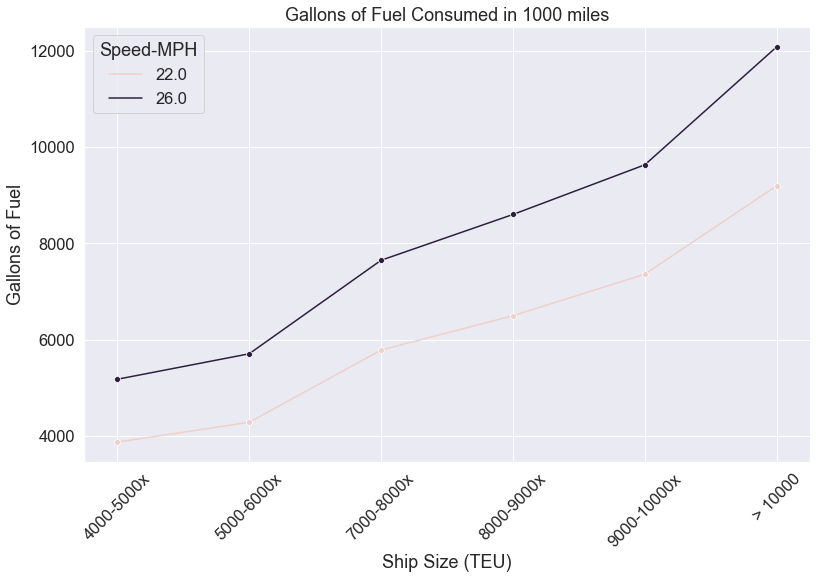

In [44]:
fig, ax = plt.subplots(figsize=(13,8))

d = sns.lineplot(data = ship1000_result, x = 'Ship Size (TEU)', y = '1000mi_fuel', hue = 'Speed-MPH', marker="o")
plt.xticks(rotation=45)
d.set(xlabel = 'Ship Size (TEU)', ylabel = 'Gallons of Fuel')
d.set_title('Gallons of Fuel Consumed in 1000 miles')

In [45]:
#gallons of fuel used for trucks per 1000 miles

truck_visual2

,Avg weight/tons,Value,Ton_MPG,truck_types
0,5,18.152113,90.760563,Light Duty - Short Wheelbase
1,10,14.905556,149.055556,Light Duty - Long Wheelbase
2,22,6.491549,142.814085,Heavy Duty


In [46]:
truck_visual2 = truck_visual2.rename(columns={'Value':'MPG'})

In [47]:
truck_visual2['1000mi']= 1000/truck_visual2['MPG']
truck_visual2

,Avg weight/tons,MPG,Ton_MPG,truck_types,1000mi
0,5,18.152113,90.760563,Light Duty - Short Wheelbase,55.090006
1,10,14.905556,149.055556,Light Duty - Long Wheelbase,67.089079
2,22,6.491549,142.814085,Heavy Duty,154.046431


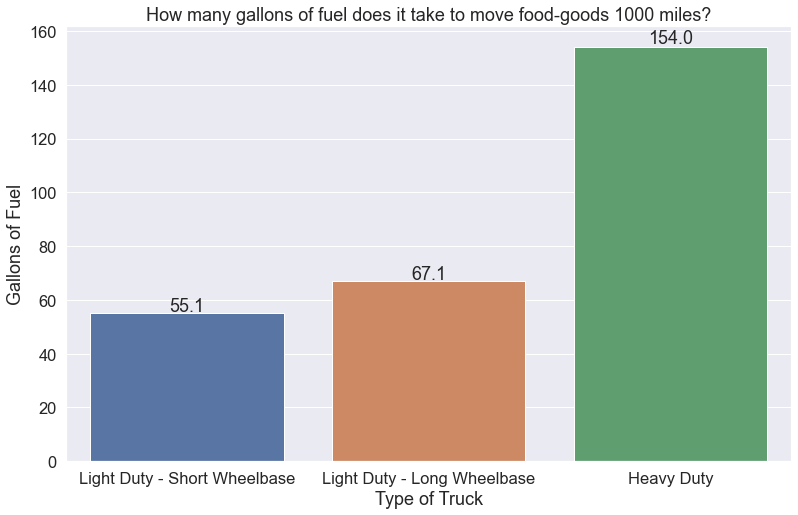

In [48]:
e = sns.barplot(data=truck_visual2, x='truck_types', y='1000mi')
e.set(xlabel = 'Type of Truck', ylabel = 'Gallons of Fuel')
e.set_title('How many gallons of fuel does it take to move food-goods 1000 miles?')

show_values(e)

In [49]:
Plane_Train_TonMPG_viz

,Type,Avg. Ton MPG
0,Plane,4.5
1,Train,436.0


In [50]:
#Plane gallons per hour info source: https://www.usatoday.com/story/travel/columnist/cox/2014/10/12/boeing-737/17036931/
#plane burns 5000 lbs fuel/hour.  1 lb jetfuel = 6.8 lbs.  = 735.29 gallons/hour
#1000 miles = 1.8 hours (data per mph workbook) = 1323.52 gallons per 1000 miles

#train gallons per hour info source: https://www.csx.com/index.cfm/about-us/the-csx-advantage/fuel-efficiency/
#trains burn 3049 gallons/fuel per 500 miles (with avg haul of 3000 tons).  1000 miles = 6098 gallons of fuel

mi1000 = [1323.52, 6098]
Plane_Train_TonMPG_viz['1000mi'] = mi1000

In [51]:
Plane_Train_TonMPG_viz

,Type,Avg. Ton MPG,1000mi
0,Plane,4.5,1323.52
1,Train,436.0,6098.00


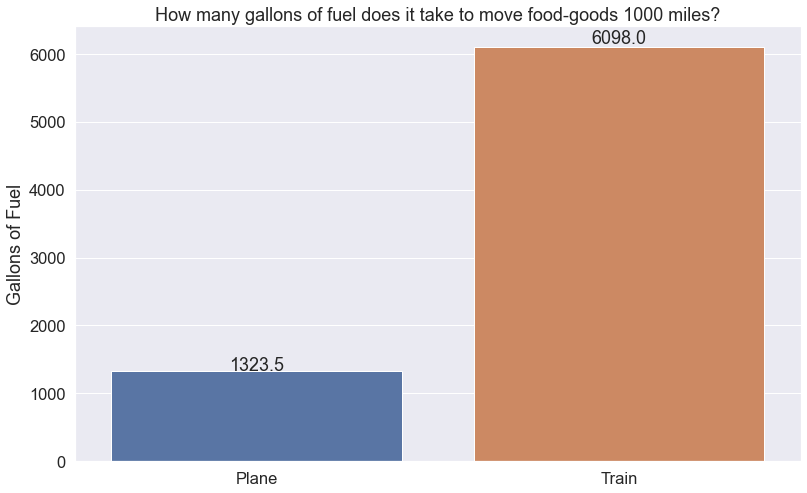

In [53]:
f = sns.barplot(data=Plane_Train_TonMPG_viz, x='Type', y='1000mi')
f.set(xlabel = '', ylabel = 'Gallons of Fuel')
f.set_title('How many gallons of fuel does it take to move food-goods 1000 miles?')

show_values(f)

# Carbon Emissions 1000 miles work

Turns out it would be a lot easier to get my carbon emissions per 1000 miles data by moving my carbon data over here, rather than trying to move all these transport methods to that notebook

In [54]:
carbon = pd.read_csv('../data/co2_vol_massa_prepped.csv')

In [55]:
carbon = carbon[['Type of fuel: ','Pounds CO2 ','lbs co2 unit of measure']]

In [56]:
carbon = carbon[carbon['Type of fuel: '].isin(['Diesel and Home Heating Fuel (Distillate Fuel Oil)','Jet Fuel'])]

In [57]:
#adding my ship fuel data to my df

ship_added = {'Type of fuel: ':'Heavy Fuel Oil', 'Pounds CO2 ': 25.5, 'lbs co2 unit of measure': 'gallon'}
carbon = carbon.append(ship_added, ignore_index = True)

In [58]:
#renaming for visualizatoin clarity

carbon['Type of fuel: '] = carbon['Type of fuel: '].replace({'Diesel and Home Heating Fuel (Distillate Fuel Oil)': 'Diesel'})

In [59]:
carbon['Pounds CO2 '] = pd.to_numeric(carbon['Pounds CO2 '])

In [60]:
carbon

,Type of fuel:,Pounds CO2,lbs co2 unit of measure
0,Diesel,22.46,gallon
1,Jet Fuel,21.50,gallon
2,Heavy Fuel Oil,25.50,gallon


In [62]:
ship1000_result['carbon1000']=ship1000_result['1000mi_fuel']*25.50

In [63]:
ship1000_result

,index,Ship Size (TEU),Speed-MPH,1000mi_fuel,carbon1000
0,2,4000-5000x,22.0,3878.750000,98908.125000
1,3,4000-5000x,26.0,5182.428571,132151.928571
2,4,5000-6000x,22.0,4290.333333,109403.500000
3,5,5000-6000x,26.0,5710.857143,145626.857143
4,6,7000-8000x,22.0,5787.777778,147588.333333
5,7,7000-8000x,26.0,7650.285714,195082.285714
6,8,8000-9000x,22.0,6500.909091,165773.181818
7,9,8000-9000x,26.0,8600.125000,219303.187500
8,10,9000-10000x,22.0,7361.777778,187725.333333
9,11,9000-10000x,26.0,9630.222222,245570.666667


Text(0.5, 1.0, 'Pounds of CO2 Released in 1000 miles')

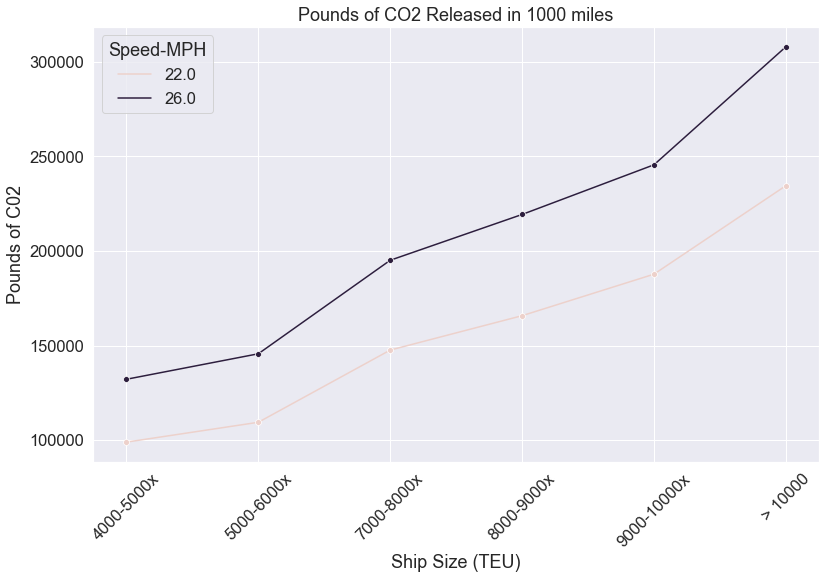

In [64]:
fig, ax = plt.subplots(figsize=(13,8))

g = sns.lineplot(data = ship1000_result, x = 'Ship Size (TEU)', y = 'carbon1000', hue = 'Speed-MPH', marker="o")
plt.xticks(rotation=45)
g.set(xlabel = 'Ship Size (TEU)', ylabel = 'Pounds of C02')
g.set_title('Pounds of CO2 Released in 1000 miles')

In [65]:
truck_visual2

,Avg weight/tons,MPG,Ton_MPG,truck_types,1000mi
0,5,18.152113,90.760563,Light Duty - Short Wheelbase,55.090006
1,10,14.905556,149.055556,Light Duty - Long Wheelbase,67.089079
2,22,6.491549,142.814085,Heavy Duty,154.046431


In [67]:
truck_visual2['carbon1000'] = truck_visual2['1000mi'] *22.46

In [68]:
truck_visual2

,Avg weight/tons,MPG,Ton_MPG,truck_types,1000mi,carbon1000
0,5,18.152113,90.760563,Light Duty - Short Wheelbase,55.090006,1237.321539
1,10,14.905556,149.055556,Light Duty - Long Wheelbase,67.089079,1506.820723
2,22,6.491549,142.814085,Heavy Duty,154.046431,3459.882838


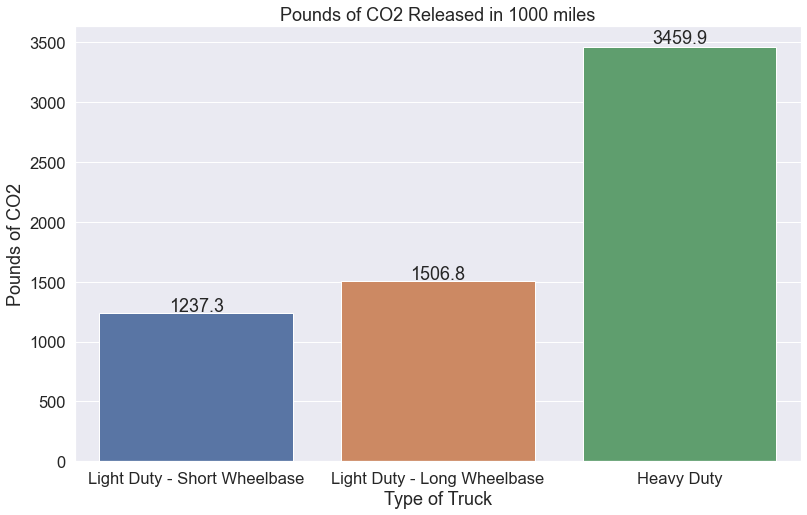

In [69]:
h = sns.barplot(data=truck_visual2, x='truck_types', y='carbon1000')
h.set(xlabel = 'Type of Truck', ylabel = 'Pounds of CO2')
h.set_title('Pounds of CO2 Released in 1000 miles')

show_values(h)